In [1]:
from scipy.misc import imsave, imread
import numpy as np

##taken fromhttps://vzaguskin.github.io/histmatching1/

def imhistmatch(picture, tint, out):
    imsrc = imread(picture)
    imtint = imread(tint)

    nbr_bins=255
    if len(imsrc.shape) < 3:
        imsrc = imsrc[:,:,np.newaxis]
        imtint = imtint[:,:,np.newaxis]

    imres = imsrc.copy()
    for d in range(imsrc.shape[2]):
        imhist,bins = np.histogram(imsrc[:,:,d].flatten(),nbr_bins,normed=True)
        tinthist,bins = np.histogram(imtint[:,:,d].flatten(),nbr_bins,normed=True)

        cdfsrc = imhist.cumsum() #cumulative distribution function
        cdfsrc = (255 * cdfsrc / cdfsrc[-1]).astype(np.uint8) #normalize

        cdftint = tinthist.cumsum() #cumulative distribution function
        cdftint = (255 * cdftint / cdftint[-1]).astype(np.uint8) #normalize


        im2 = np.interp(imsrc[:,:,d].flatten(),bins[:-1],cdfsrc)



        im3 = np.interp(im2,cdftint, bins[:-1])

        imres[:,:,d] = im3.reshape((imsrc.shape[0],imsrc.shape[1] ))

    try:
        imsave(out, imres)
    except:
        imsave(out, imres.reshape((imsrc.shape[0],imsrc.shape[1] )))

In [2]:
##want to get the average histogram from the no-fish images?
##template test: day, nofish "../data/raw/train/NoF/img_00008.jpg"
template = "../data/raw/train/NoF/img_00008.jpg"
##alba-test night "../data/raw/train/ALB/img_00019.jpg"
imhistmatch("../data/raw/train/ALB/img_00019.jpg", template, "../data/processed/histnormresult_test_alba-night.jpg")

#alba-test day ("../data/raw/train/ALB/img_00003.jpg")
imhistmatch("../data/raw/train/ALB/img_00003.jpg", template, "../data/processed/histnormresult_test_alba-day.jpg")

##opa-test day ("../data/raw/train/LAG/img_00784.jpg")
imhistmatch("../data/raw/train/LAG/img_00784.jpg", template, "../data/processed/histnormresult_test_opa-day.jpg")

##opa-test night ("../data/raw/train/LAG/img_02089.jpg")
imhistmatch("../data/raw/train/LAG/img_02089.jpg", template, "../data/processed/histnormresult_test_opa-night.jpg")


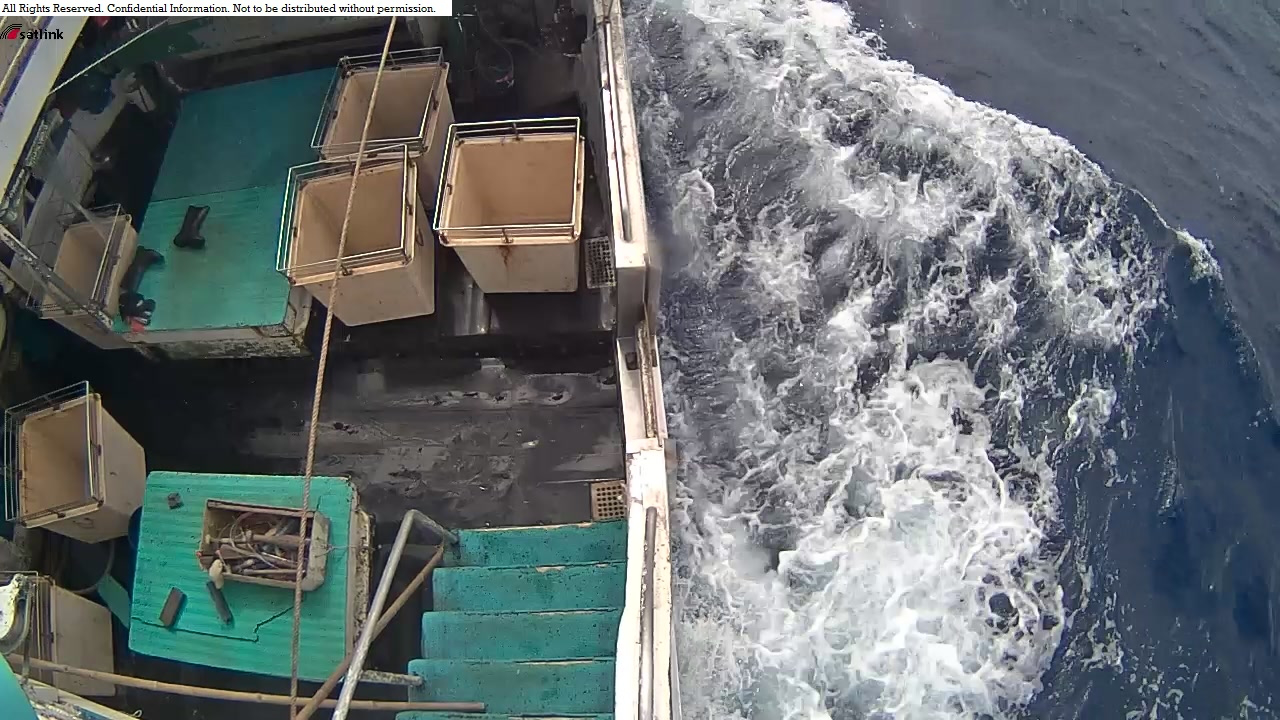

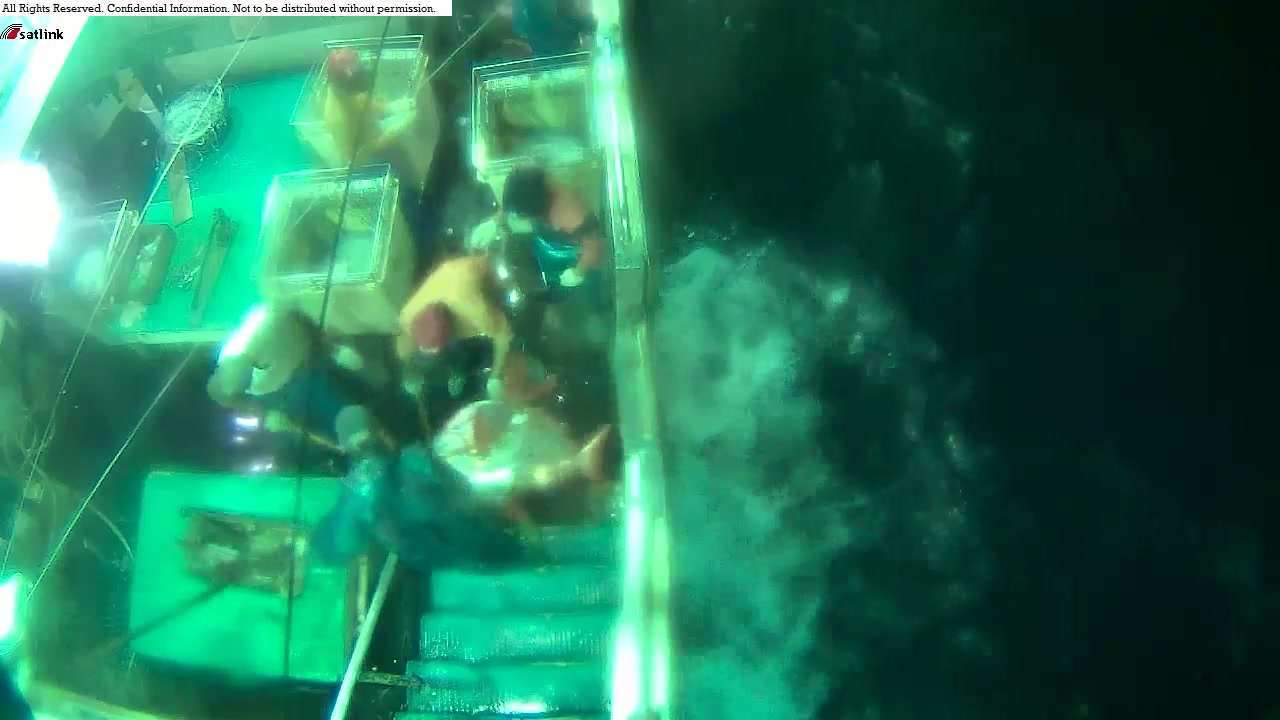

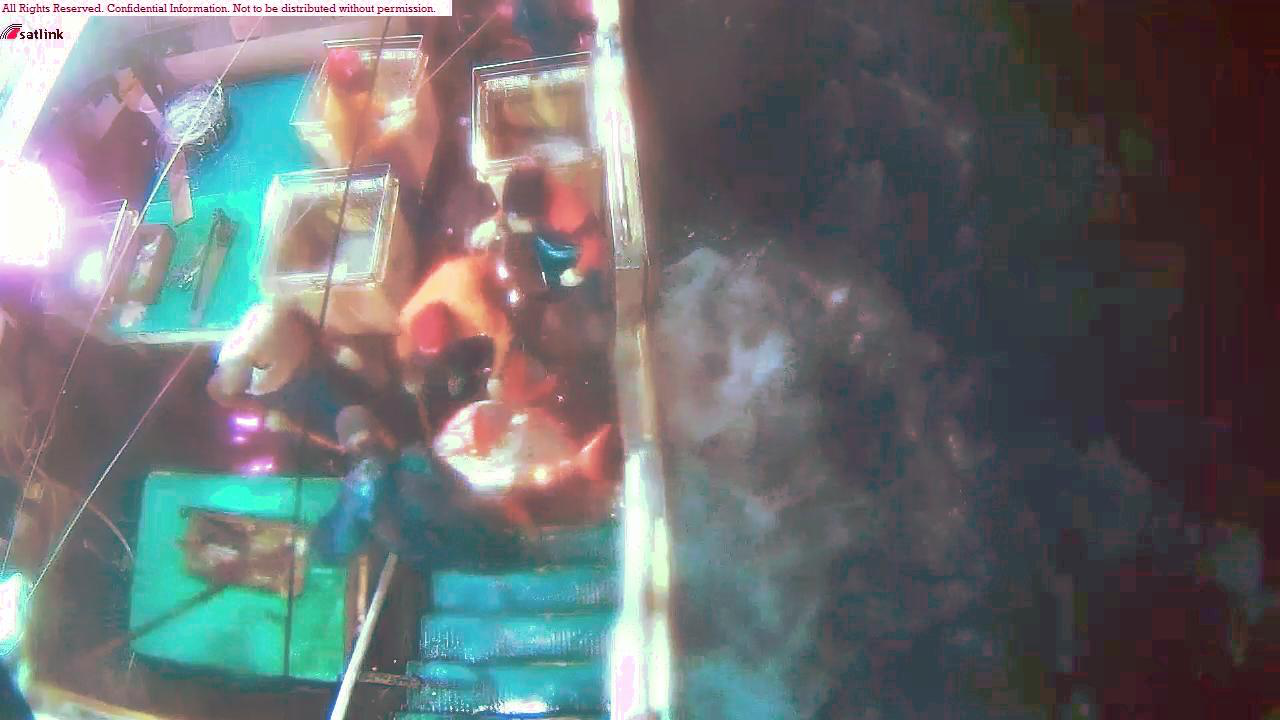

In [3]:
from PIL import Image
from IPython.display import display
display(
    Image.open(template),    
    Image.open("../data/raw/train/LAG/img_02089.jpg"),
    Image.open("../data/processed/histnormresult_test_opa-night.jpg"),
    )

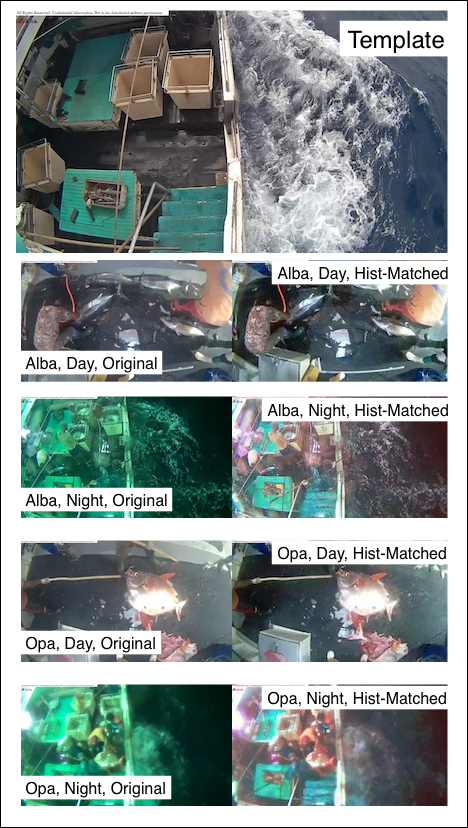

In [4]:
display(Image.open('../data/processed/make_display/Display_HistMatch.png'))